# Text Classification
---

Nama : Wanda Desi R

NIm: 164221026


## Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-deep')
from sklearn.metrics import confusion_matrix
import nltk
import re

<ipython-input-1-317e83df396c>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


## Load Data

In [ ]:
df = pd.read_csv('/content/data.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## EDA

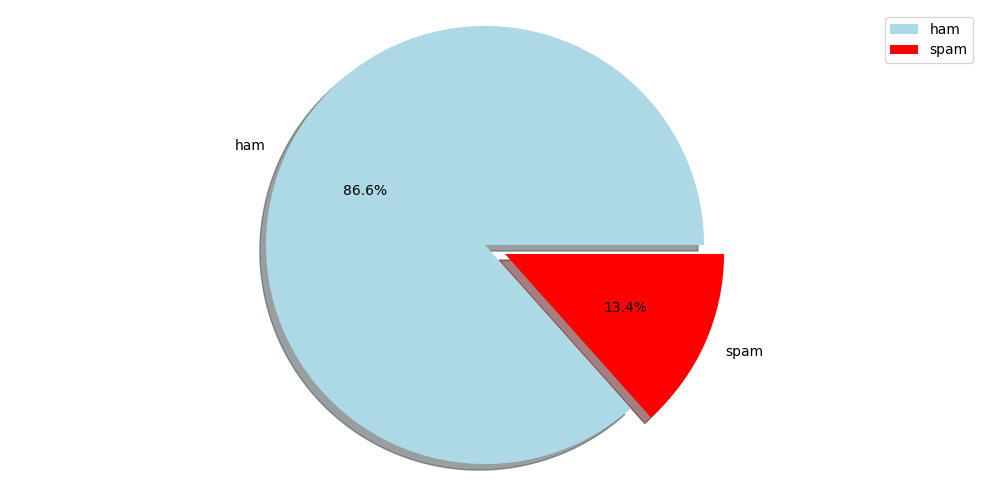

In [ ]:
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(10, 5))
ax1.pie(df['Category'].value_counts(), explode=explode, labels=['ham', 'spam'], autopct='%1.1f%%',
        shadow=True, colors=['lightblue', 'red'])  # Set colors for ham and spam
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.legend()
plt.show()

## Preprocessing

In [ ]:
import string
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def text_process(mess):
    # cek karakter yang ada di string.punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')] #stopword

In [ ]:
df['Message'].apply(text_process).head()

,Message
0,"[Go, jurong, point, crazy, Available, bugis, n..."
1,"[Ok, lar, Joking, wif, u, oni]"
2,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,"[U, dun, say, early, hor, U, c, already, say]"
4,"[Nah, dont, think, goes, usf, lives, around, t..."


In [ ]:
#lowercase
df['Message'] = df['Message'].str.lower()

## Vectorizer BoW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['Message'])

In [ ]:
messages_bow = bow_transformer.transform(df['Message'])

## Split

In [ ]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(messages_bow, df['Category'], test_size=0.2, random_state=42)

## Classification Model

### SVM

In [ ]:
from sklearn.svm import SVC

# Train an SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Train a Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test)

## evaluation

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### SVM

In [ ]:
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy SVM:", accuracy)

# classification report
print(classification_report(y_test, y_pred_svm))

Accuracy SVM: 0.9820627802690582
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       0.98      0.89      0.93       149

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



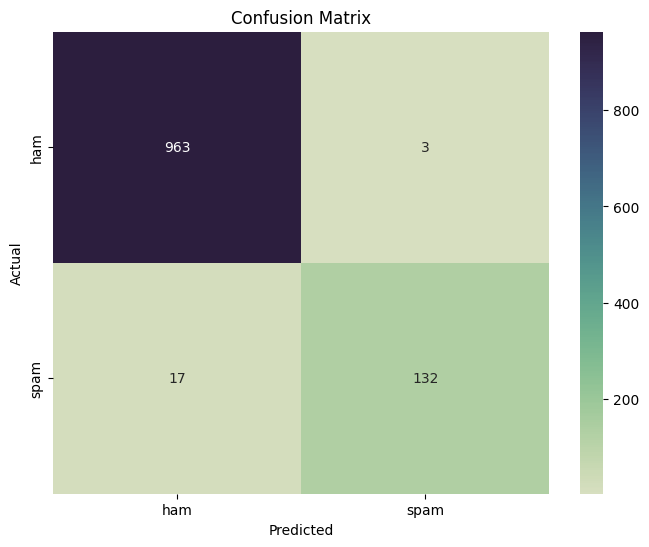

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# You can also visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True), xticklabels=['ham', 'spam'],
            yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Random Forest

In [ ]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9748878923766816
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       966
        spam       1.00      0.81      0.90       149

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



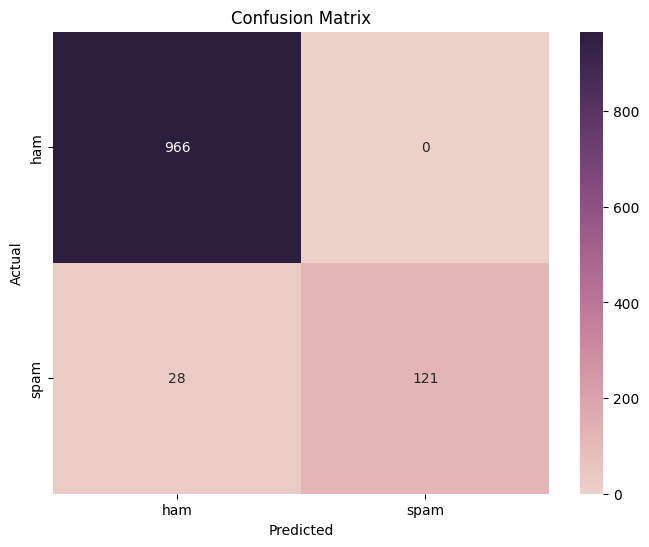

In [ ]:
# Create a confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)


# You can also visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True),
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Decision Tree

In [ ]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9695067264573991
              precision    recall  f1-score   support

         ham       0.97      0.99      0.98       966
        spam       0.93      0.83      0.88       149

    accuracy                           0.97      1115
   macro avg       0.95      0.91      0.93      1115
weighted avg       0.97      0.97      0.97      1115



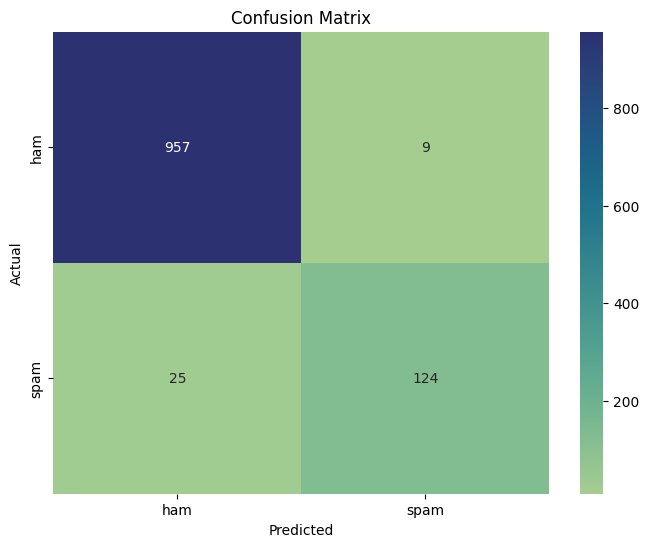

In [ ]:
# Create a confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# You can also visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='crest', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Naive Bayes

In [ ]:
# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.9748878923766816
              precision    recall  f1-score   support

         ham       0.99      0.98      0.99       966
        spam       0.89      0.93      0.91       149

    accuracy                           0.97      1115
   macro avg       0.94      0.96      0.95      1115
weighted avg       0.98      0.97      0.98      1115



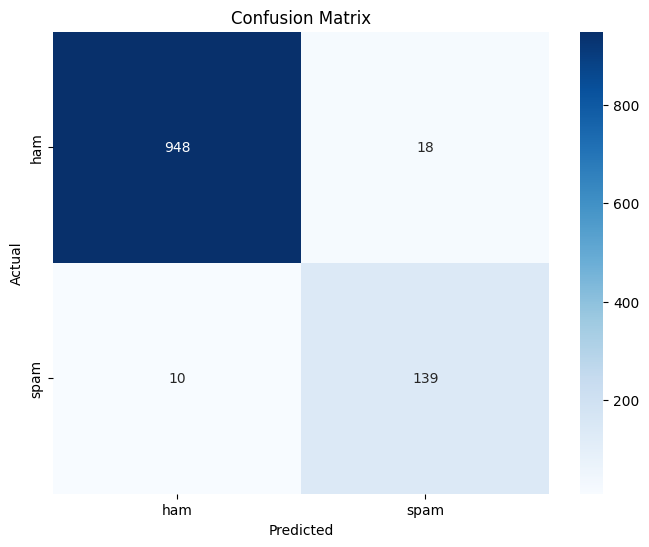

In [ ]:
# Create a confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# You can also visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## other insight

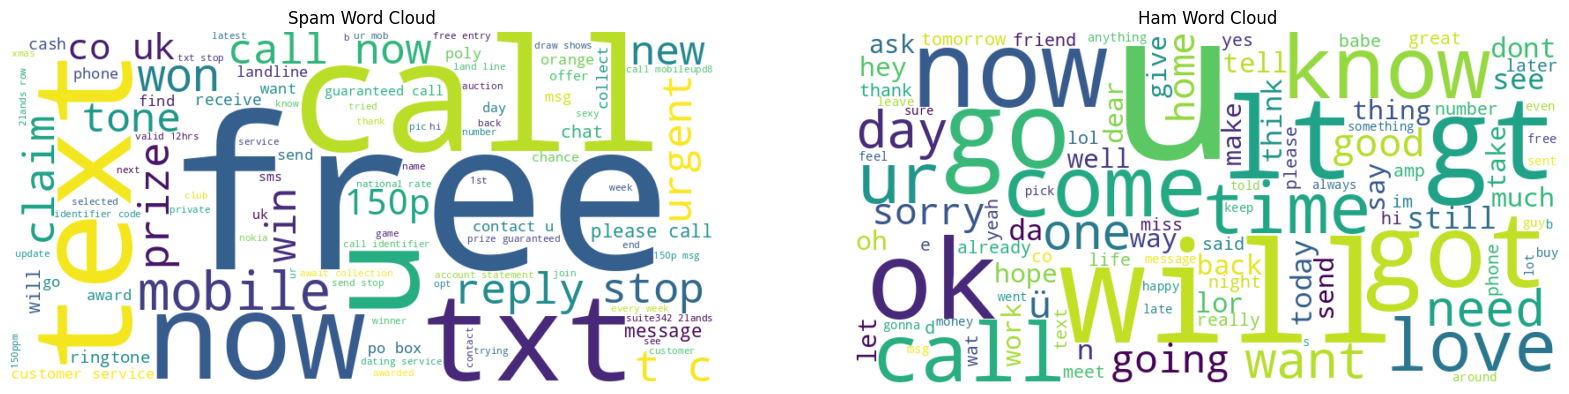

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Separate spam and ham messages
spam_messages = df[df['Category'] == 'spam']['Message']
ham_messages = df[df['Category'] == 'ham']['Message']

# Create WordClouds for spam and ham messages
spam_wordcloud = WordCloud(width=800,max_words=100, height=400, background_color='white').generate(' '.join(spam_messages))
ham_wordcloud = WordCloud(width=800, max_words=100, height=400, background_color='white').generate(' '.join(ham_messages))

# Display the word clouds
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Word Cloud')
plt.axis('off')

plt.show()

## misspredicted

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

# Find the indices where the predicted label does not match the actual label
incorrect_indices = np.where(y_pred_svm != y_test)[0]

# Print the incorrect predictions and their corresponding indices
print("Incorrect Predictions and Indices:")
for index in incorrect_indices:
    print(f"Index: {index}, Actual: {y_test.iloc[index]}, Predicted: {y_pred_svm[index]}, Message: {df['Message'].iloc[index]}")


Incorrect Predictions and Indices:
Index: 74, Actual: spam, Predicted: ham, Message: u can call me now...
Index: 158, Actual: ham, Predicted: spam, Message: hello, my love. what are you doing? did you get to that interview today? are you you happy? are you being a good boy? do you think of me?are you missing me ?
Index: 160, Actual: spam, Predicted: ham, Message: you are a winner u have been specially selected 2 receive £1000 cash or a 4* holiday (flights inc) speak to a live operator 2 claim 0871277810810
Index: 234, Actual: spam, Predicted: ham, Message: yes:)here tv is always available in work place..
Index: 272, Actual: spam, Predicted: ham, Message: night has ended for another day, morning has come in a special way. may you smile like the sunny rays and leaves your worries at the blue blue bay.
Index: 291, Actual: spam, Predicted: ham, Message: hey you told your name to gautham ah?
Index: 324, Actual: spam, Predicted: ham, Message: that would be great. we'll be at the guild. could

In [ ]:
incorrect_indices = np.where(y_pred_svm != y_test)[0]

y_test = y_test.reset_index(drop=True)

incorrect_predictions_df = pd.DataFrame({
    'Index': incorrect_indices,
    'Actual': y_test.iloc[incorrect_indices].values,
    'Predicted': y_pred_svm[incorrect_indices],
    'Message': df['Message'].iloc[y_test.index[incorrect_indices]].values
})

print("Incorrect Predictions:")
incorrect_predictions_df


Incorrect Predictions:


,Index,Actual,Predicted,Message
0,74,spam,ham,u can call me now...
1,158,ham,spam,"hello, my love. what are you doing? did you ge..."
2,160,spam,ham,you are a winner u have been specially selecte...
3,234,spam,ham,yes:)here tv is always available in work place..
4,272,spam,ham,"night has ended for another day, morning has c..."
5,291,spam,ham,hey you told your name to gautham ah?
6,324,spam,ham,that would be great. we'll be at the guild. co...
7,337,ham,spam,cool. so how come you havent been wined and di...
8,393,spam,ham,morning only i can ok.
9,408,spam,ham,hello! good week? fancy a drink or something l...


In [ ]:
! pip install lime -qqq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
# Melihat koefisien dari fitur-fitur dalam model SVM
feature_names = bow_transformer.get_feature_names_out()  # Daftar semua fitur (kata)
coefficients = svm_model.coef_.toarray()  # Mendapatkan koefisien dari model SVM

# Gabungkan kata dan bobotnya untuk kelas tertentu
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients[0]  # Koefisien untuk kelas tertentu
}).sort_values(by='Coefficient', ascending=False)

In [ ]:
for index, row in feature_importance.iterrows():
  if row['Coefficient'] > 0:
    print(f"Feature: {row['Feature']}, Coefficient: {row['Coefficient']}")

Feature: 146tf150p, Coefficient: 1.0
Feature: error, Coefficient: 1.0
Feature: 22, Coefficient: 1.0
Feature: ringtoneking, Coefficient: 1.0
Feature: 84484, Coefficient: 1.0
Feature: filthy, Coefficient: 0.8083844626461605
Feature: stories, Coefficient: 0.8083844626461605
Feature: £12, Coefficient: 0.7950096423454641
Feature: 88066, Coefficient: 0.7950096423454641
Feature: freeringtonereply, Coefficient: 0.7728765014659037
Feature: 85233, Coefficient: 0.7728765014659037
Feature: 946, Coefficient: 0.7462777665862329
Feature: wining, Coefficient: 0.7462777665862329
Feature: service, Coefficient: 0.7379673807463922
Feature: claim, Coefficient: 0.7264678608010549
Feature: ringtone, Coefficient: 0.725928921835348
Feature: content, Coefficient: 0.6630011094868548
Feature: urgent, Coefficient: 0.6514110588766285
Feature: girls, Coefficient: 0.619644815726371
Feature: httptms, Coefficient: 0.6143322252395305
Feature: widelivecomindex, Coefficient: 0.6143322252395305
Feature: immediately, Coeffi

In [ ]:
for index, row in feature_importance.iterrows():
  if row['Coefficient'] < 0:
    print(f"Feature: {row['Feature']}, Coefficient: {row['Coefficient']}")

Feature: kthen, Coefficient: -0.0001250895893969284
Feature: closer, Coefficient: -0.00022476417172338136
Feature: goodnoon, Coefficient: -0.00022476417172338136
Feature: cares, Coefficient: -0.00022476417172338136
Feature: heartsnot, Coefficient: -0.00022476417172338136
Feature: abiola, Coefficient: -0.00031375475241359407
Feature: abbey, Coefficient: -0.00031375475241359407
Feature: west, Coefficient: -0.0003763285224566799
Feature: palm, Coefficient: -0.0003763285224566799
Feature: tampa, Coefficient: -0.0003763285224566799
Feature: omw, Coefficient: -0.0003763285224566799
Feature: whatever, Coefficient: -0.00039099211864995884
Feature: stamps, Coefficient: -0.00039099211864995884
Feature: foreign, Coefficient: -0.00039099211864995884
Feature: smth, Coefficient: -0.0004287429636904163
Feature: toa, Coefficient: -0.0004287429636904163
Feature: ned, Coefficient: -0.0004287429636904163
Feature: payoh, Coefficient: -0.0004287429636904163
Feature: mandan, Coefficient: -0.0004574263315354

In [ ]:
for index, row in feature_importance.iterrows():
  if row['Coefficient'] == 0:
    print(f"Feature: {row['Feature']}, Coefficient: {row['Coefficient']}")

Streaming output truncated to the last 5000 lines.
Feature: ne, Coefficient: 0.0
Feature: nbme, Coefficient: 0.0
Feature: prescripiton, Coefficient: 0.0
Feature: nav, Coefficient: 0.0
Feature: nauseous, Coefficient: 0.0
Feature: nature, Coefficient: 0.0
Feature: natuition, Coefficient: 0.0
Feature: nationwide, Coefficient: 0.0
Feature: wwwtextpodnet, Coefficient: 0.0
Feature: wwwtklscom, Coefficient: 0.0
Feature: needle, Coefficient: 0.0
Feature: neekunna, Coefficient: 0.0
Feature: neway, Coefficient: 0.0
Feature: neft, Coefficient: 0.0
Feature: nevr, Coefficient: 0.0
Feature: neville, Coefficient: 0.0
Feature: nevering, Coefficient: 0.0
Feature: nevamindwe, Coefficient: 0.0
Feature: neva, Coefficient: 0.0
Feature: networks, Coefficient: 0.0
Feature: networking, Coefficient: 0.0
Feature: netno, Coefficient: 0.0
Feature: nething, Coefficient: 0.0
Feature: netflix, Coefficient: 0.0
Feature: netcollex, Coefficient: 0.0
Feature: net, Coefficient: 0.0
Feature: neshanthtel, Coefficient: 0.0
